In [216]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
import seaborn as sns
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot  as plt

In [217]:
df = pd.read_csv("diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [218]:
"""
---This is data of diabetic patients
---This dataset has 768 patients data
---It has 9 columns Pregnancies,Glucose,Blood Pressure,SKin Thickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
"""

'\n---This is data of diabetic patients\n---This dataset has 768 patients data\n---It has 9 columns Pregnancies,Glucose,Blood Pressure,SKin Thickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome\n'

In [219]:
#Compute mean & standard deviation , tabulate and visualize the age of the patients.

df_1=df[["Age","Outcome"]]
df_1

,Age,Outcome
0,50,1
1,31,0
2,32,1
3,21,0
4,33,1
...,...,...
763,63,0
764,27,0
765,30,0
766,47,1


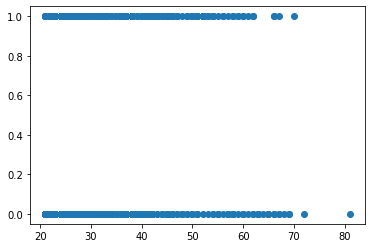

In [220]:
plt.scatter(df["Age"],df["Outcome"])
plt.show()

In [221]:
df["Age"].describe()

count    768.000000
mean      33.240885
std       11.760232
min       21.000000
25%       24.000000
50%       29.000000
75%       41.000000
max       81.000000
Name: Age, dtype: float64

<AxesSubplot:>

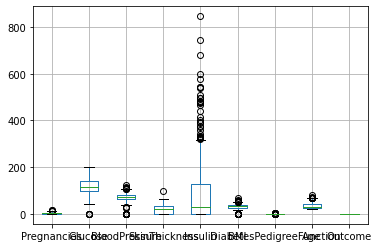

In [222]:
df.boxplot()

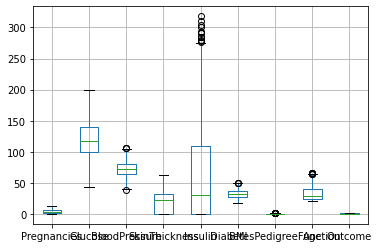

In [223]:
for i in df:
    q1=df[i].quantile(0.25)
    q2=df[i].quantile(0.50)
    q3=df[i].quantile(0.75)
    iqr=q3-q1
    df[i]=np.where(df[i]<q1-(1.5*iqr),q2,df[i])
    df[i]=np.where(df[i]>q3+(1.5*iqr),q2,df[i])
df.boxplot()
plt.show()

In [224]:
#. Analyze and tabulate the relationship of age, BMI of patients with respect to the class
df_2=df[["BMI","Age","Outcome"]]
df_2

,BMI,Age,Outcome
0,33.6,50.0,1.0
1,26.6,31.0,0.0
2,23.3,32.0,1.0
3,28.1,21.0,0.0
4,43.1,33.0,1.0
...,...,...,...
763,32.9,63.0,0.0
764,36.8,27.0,0.0
765,26.2,30.0,0.0
766,30.1,47.0,1.0


In [225]:
corr1=df_2.corr()
print(corr1)
arr=corr1.values
print(arr[:,2])

              BMI       Age   Outcome
BMI      1.000000  0.077668  0.300615
Age      0.077668  1.000000  0.265858
Outcome  0.300615  0.265858  1.000000
[0.30061523 0.26585773 1.        ]


In [226]:
#Tabulate the class label and comment on whether the classes are balanced
a=df.Outcome.value_counts()
print(a)
print("As the ratio of number of 0s and 1s is not abnormally high so its an balanced class") 

0.0    500
1.0    268
Name: Outcome, dtype: int64
As the ratio of number of 0s and 1s is not abnormally high so its an balanced class


In [227]:
#Use the data set to build a logistic regression model (using sklearn) and predict the class label. Divide
#the dataset into training and test set (70,30) using train_test_split method in sklearn
X = df.drop(columns='Outcome', axis=1) 
y = df.Outcome.values

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [228]:
data_scaler_minmax = preprocessing.MinMaxScaler(feature_range=(0,1))
x_train = data_scaler_minmax.fit_transform(x_train)
x_test = data_scaler_minmax.fit_transform(x_test)

In [229]:
logisticRegr = LogisticRegression()
logisticRegr.fit(x_train, y_train)
logisticRegr.predict(x_test[0].reshape(1,-1))
predictions = logisticRegr.predict(x_test)

In [230]:
score = logisticRegr.score(x_test, y_test)
print(score)

0.7792207792207793


In [231]:
#Use the test data set and evaluate the performance using a confusion matrix. Visualize the confusion
#matrix using a heat map
y_pred=logisticRegr.predict(x_test)
confusion_matrix=confusion_matrix(y_test,y_pred)
print(confusion_matrix)

[[135  11]
 [ 40  45]]


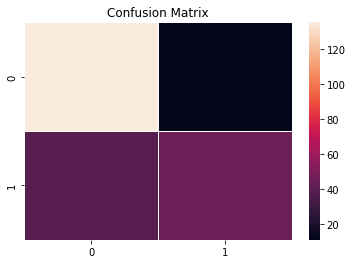

In [232]:
ax = sns.heatmap( confusion_matrix , linewidth = 0.5  )
plt.title( "Confusion Matrix" )
plt.show()

In [233]:
#Compute accuracy rate, true positive and true negative rate and comment on the performance
Accuracy_rate=(confusion_matrix[0][0]+confusion_matrix[1][1])/(confusion_matrix[0][1]+confusion_matrix[1][0]+confusion_matrix[1][1]+confusion_matrix[0][0])
print(Accuracy_rate)

0.7792207792207793


In [234]:
True_positive=confusion_matrix[0][0]/(confusion_matrix[0][0]+confusion_matrix[1][0])
print(True_positive)

0.7714285714285715


In [235]:
False_positive=1-True_positive
print(False_positive)

0.22857142857142854


In [236]:
#Visualize the ROC curve, and comment on the performance of the classifier
y_prob=logisticRegr.predict_proba(x_test)[::,1]
fpr,tpr,_=roc_curve(np.squeeze(y_test),y_prob)
auc=roc_auc_score(y_test,y_prob)

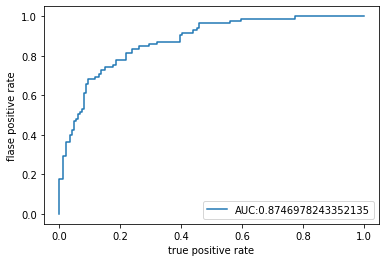

In [237]:
plt.plot(fpr,tpr,label="AUC:"+str(auc))
plt.xlabel('true positive rate')
plt.ylabel('flase positive rate')
plt.legend(loc=4)
plt.show()
